In [1]:
%config IPCompleter.use_jedi = False

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import step01_cleandata as clean_data
from step01_cleandata import BAD_WORDS, TAG_NAME_MAP

sns.set_theme(style="whitegrid")

In [3]:
books = pd.read_csv("./goodbooks-10k/books.csv")
book_tags = pd.read_csv("./goodbooks-10k/book_tags.csv")
ratings = pd.read_csv("./goodbooks-10k/ratings.csv")
tags = pd.read_csv("./goodbooks-10k/tags.csv")

book_data = pd.read_csv("toptags10/book_data.csv")
book_data_log = pd.read_csv("toptags10/book_data_log.csv")

In [4]:
top_tags = (
    book_tags
    .merge(books, on="goodreads_book_id")
    .filter(items=["count", "goodreads_book_id", "tag_id", "authors", "ratings_count", "original_title"])
    .merge(tags, on="tag_id")
    .groupby("tag_name", as_index=False)
    .sum()
    .sort_values("count", ascending=False)
    #.query("tag_name != 'to-read'")
    .head(10)
)

In [5]:
def plot_tag_count(top_tags, title, xlabel, ylabel, uselog=False, save=False):
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(x=top_tags.tag_name, height=top_tags["count"], log=uselog)
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment="right", fontsize=15)
    plt.title(title, fontsize=30)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    #plt.axis(ymin=1, ymax=1.5*10**8)
    if save:
        plt.savefig("plots/"+title.lower().replace(" ", "_")+".png", bbox_inches="tight")
    else:
        plt.show()

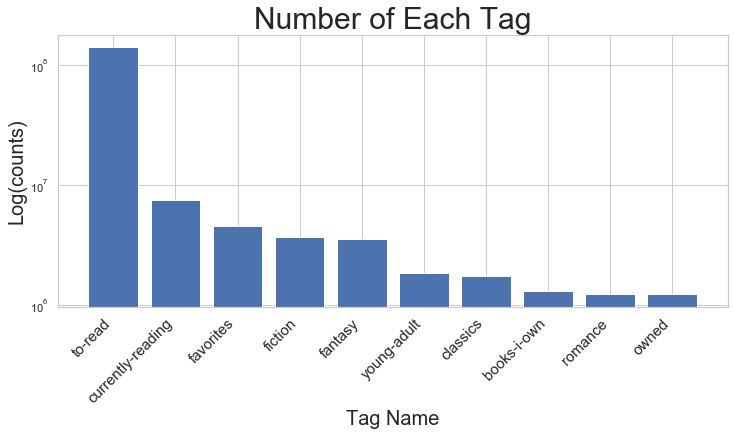

In [6]:
plot_tag_count(top_tags, title="Number of Each Tag", xlabel="Tag Name", ylabel="Log(counts)",
              uselog=True, save=True)

In [7]:
filtered_tags = clean_data.remove_tags_containing_bad_word(tags, BAD_WORDS)
tag_id_map = clean_data.convert_tag_name_map_to_tag_id_map(TAG_NAME_MAP, filtered_tags)
cleaned_book_tags = clean_data.consolidate_tags(book_tags, tag_id_map)
top_tags_clean = clean_data.get_most_popular_n_tags(cleaned_book_tags, filtered_tags, n=10)

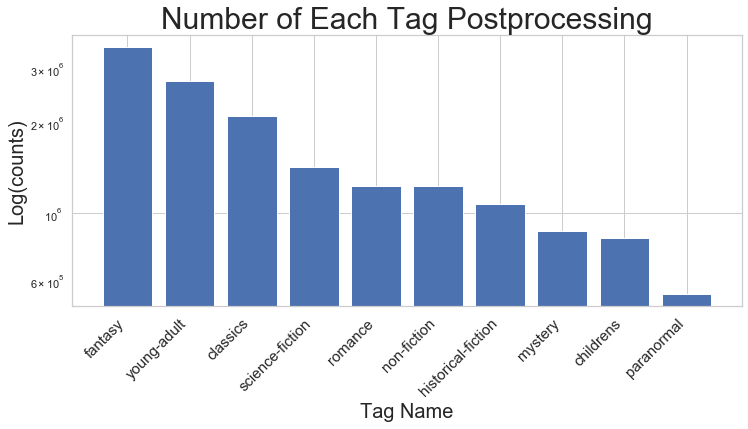

In [8]:
plot_tag_count(top_tags_clean, title="Number of Each Tag Postprocessing", xlabel="Tag Name", ylabel="Log(counts)",
              uselog=True, save=True)

In [9]:
hungergames = (
    books
    .filter(items=["book_id", "authors", "original_title"])
    .merge(book_data, on = "book_id")
    .query("original_title == 'The Hunger Games'")
)
hungergames.iloc[:, 4:].columns.to_list()

['biography',
 'business',
 'childrens',
 'classics',
 'fantasy',
 'historical-fiction',
 'humor',
 'memoir',
 'mystery',
 'non-fiction',
 'paranormal',
 'romance',
 'science',
 'science-fiction',
 'young-adult']

In [10]:
hungergames.iloc[:, 4:].to_numpy().flatten()

array([0.        , 0.        , 0.        , 0.        , 0.28583362,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.08812939, 0.        , 0.14079776, 0.48523923])

In [11]:
def plot_genre_distribution_for_book(book_title, books, book_data, save=False, title_append=""):
    book_row = (
        books
        .filter(items=["book_id", "authors", "original_title"])
        .merge(book_data, on = "book_id")
        .query("original_title == @book_title")
    )
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.bar(x=book_row.iloc[:, 4:].columns.to_list(), height=book_row.iloc[:, 4:].to_numpy().flatten())
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment="right", fontsize=15)
    plt.title(book_title+title_append, fontsize=30)
    plt.xlabel("Genre", fontsize=20)
    plt.ylabel("Proportion", fontsize=20)
    #plt.axis(ymin=1, ymax=1.5*10**8)
    if save:
        plt.savefig("plots/"+book_title.lower().replace(" ", "_")+title_append+".png", bbox_inches="tight")
    else:
        plt.show()

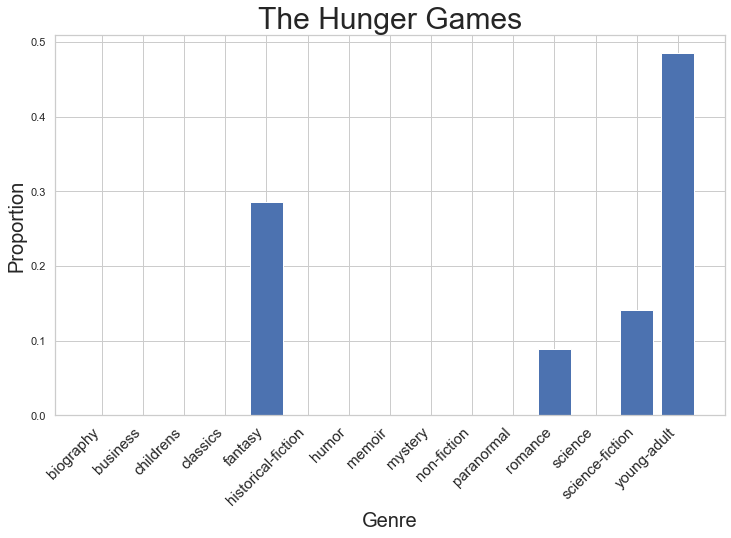

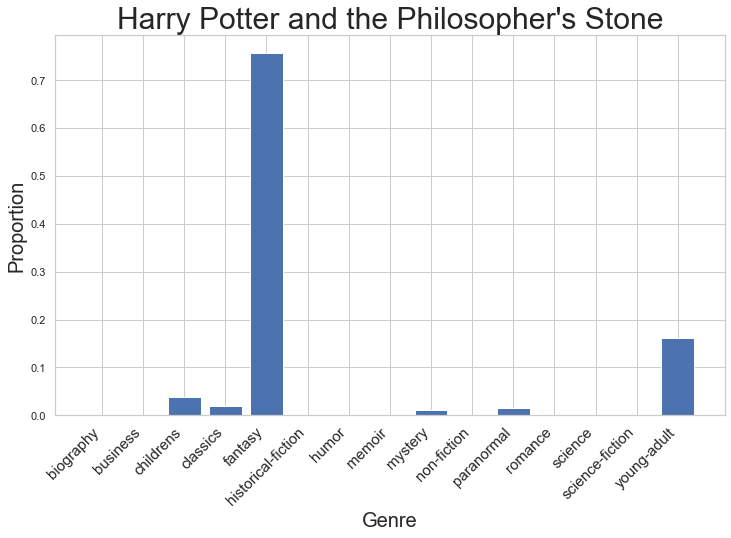

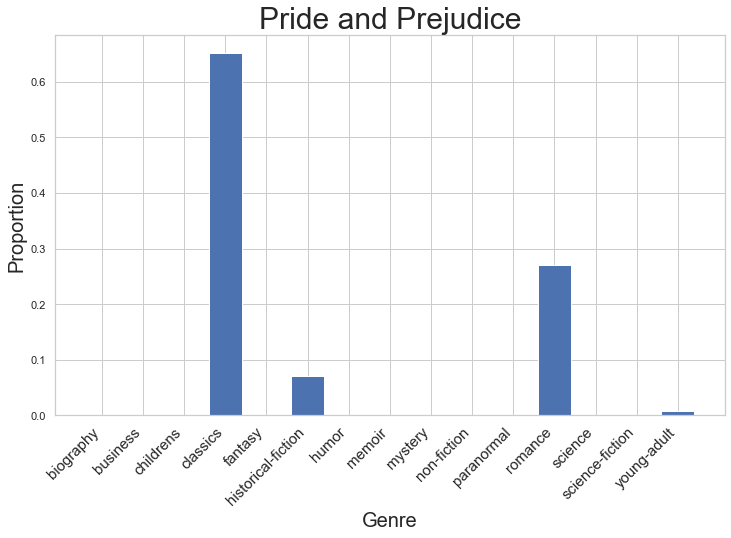

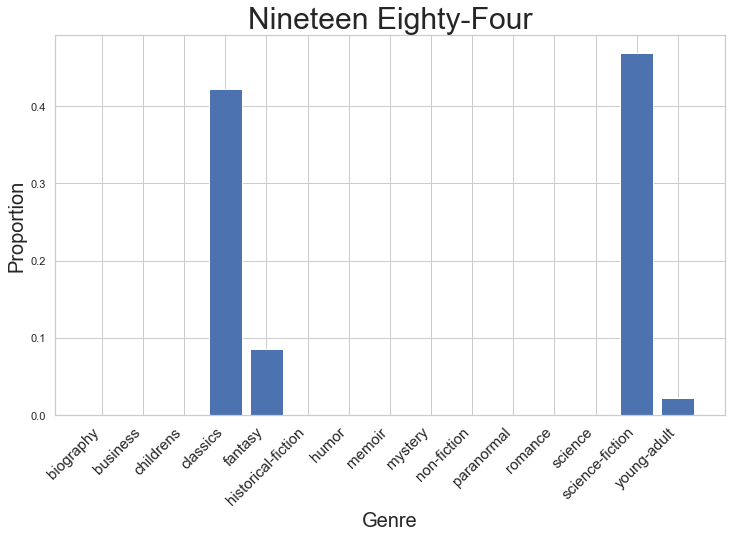

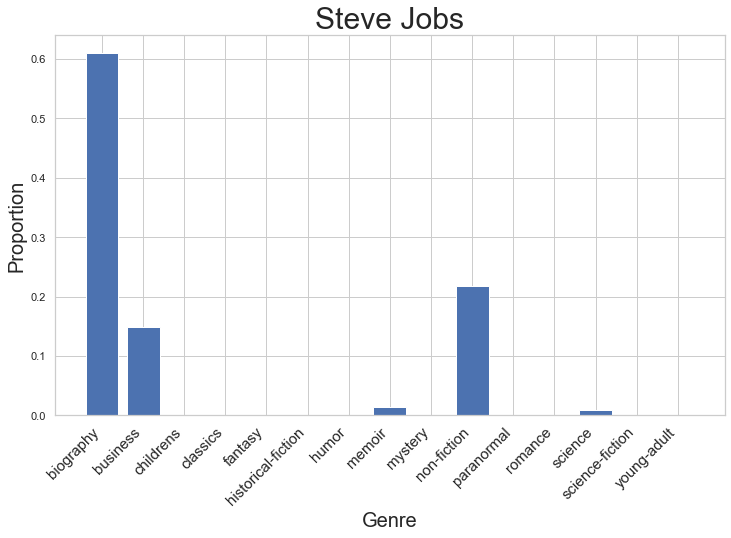

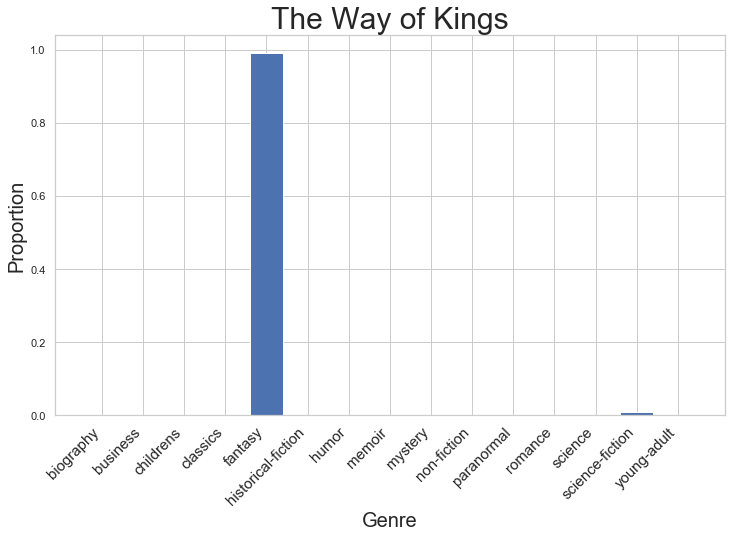

In [12]:
plot_genre_distribution_for_book("The Hunger Games", books, book_data, save=True)
plot_genre_distribution_for_book("Harry Potter and the Philosopher's Stone", books, book_data, save=True)
plot_genre_distribution_for_book("Pride and Prejudice", books, book_data, save=True)
plot_genre_distribution_for_book("Nineteen Eighty-Four", books, book_data, save=True)
plot_genre_distribution_for_book("Steve Jobs", books, book_data, save=True)
plot_genre_distribution_for_book("The Way of Kings", books, book_data)

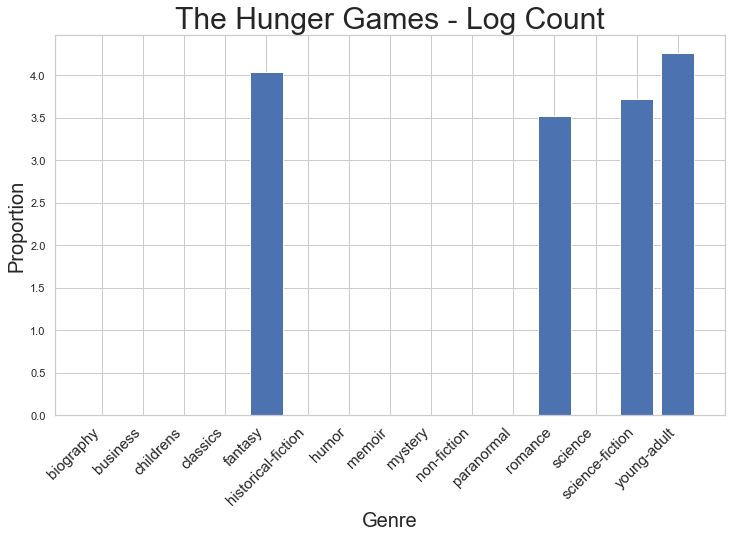

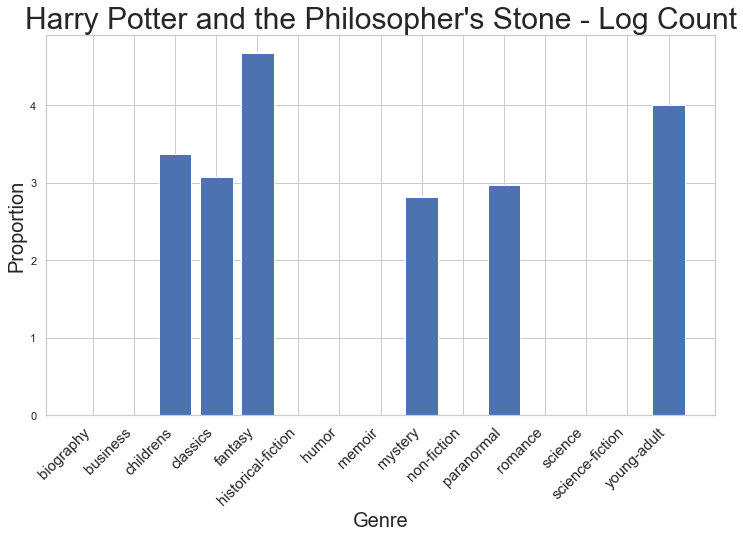

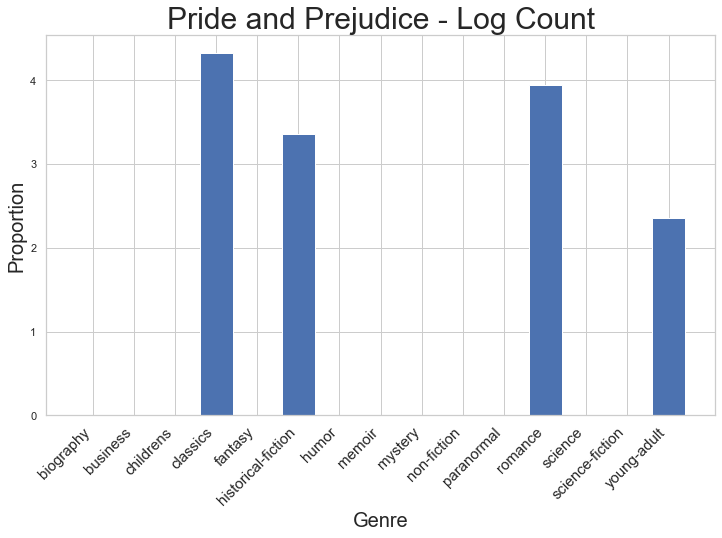

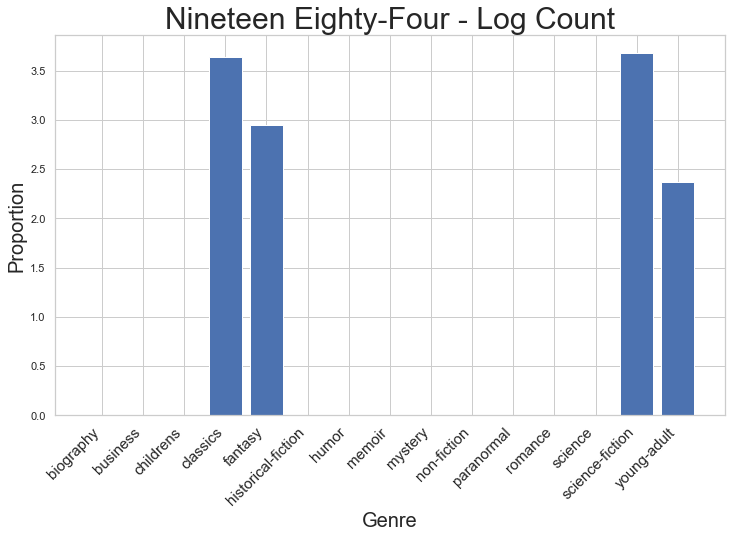

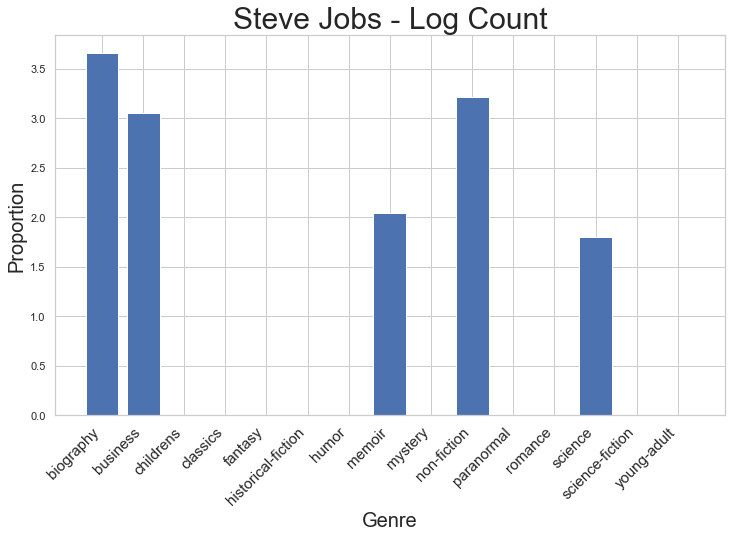

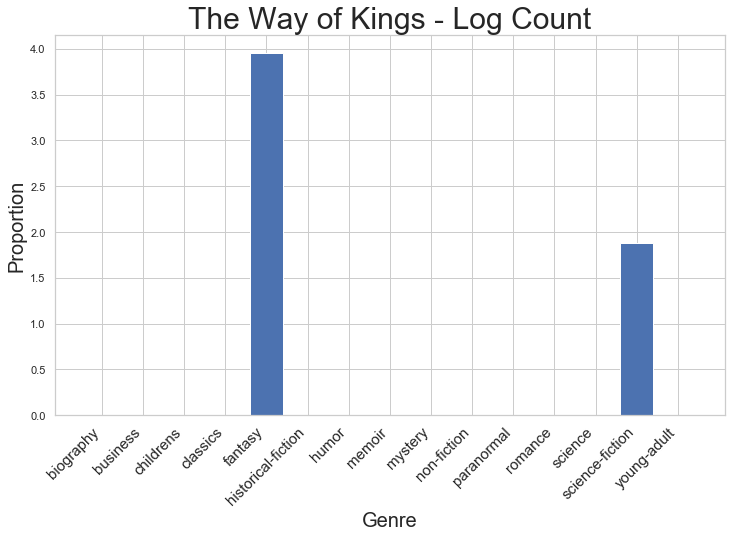

In [13]:
plot_genre_distribution_for_book("The Hunger Games", books, book_data_log, save=True, title_append=" - Log Count")
plot_genre_distribution_for_book("Harry Potter and the Philosopher's Stone", books, book_data_log, save=True, title_append=" - Log Count")
plot_genre_distribution_for_book("Pride and Prejudice", books, book_data_log, save=True, title_append=" - Log Count")
plot_genre_distribution_for_book("Nineteen Eighty-Four", books, book_data_log, save=True, title_append=" - Log Count")
plot_genre_distribution_for_book("Steve Jobs", books, book_data_log, save=True, title_append=" - Log Count")
plot_genre_distribution_for_book("The Way of Kings", books, book_data_log, title_append=" - Log Count")

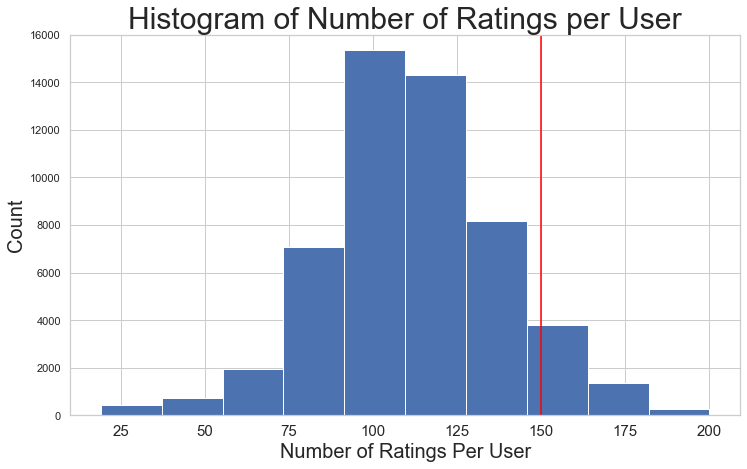

In [14]:
ratings_per_user = (
    ratings
    .groupby("user_id", as_index=False)
    .count()
    .sort_values("rating", ascending=False)
    .rating
    .tolist()
)

fig, ax = plt.subplots(figsize=(12, 7))
ax.hist(ratings_per_user)
ax.vlines(x=150, ymin=0, ymax=16000, colors="red")
ax.axis(ymin=0, ymax=16000)
labels = ax.get_xticklabels()
plt.setp(labels, fontsize=15)
plt.title("Histogram of Number of Ratings per User", fontsize=30)
plt.xlabel("Number of Ratings Per User", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.savefig("plots/dist_number_of_ratings_per_user.png", bbox_inches="tight")

# number of tags per book

In [15]:
number_of_tags_per_book = (
    book_tags
    .groupby("goodreads_book_id", as_index=False)
    .sum()
    .loc[:,"count"]
    .apply(np.log10)
    .tolist()
)

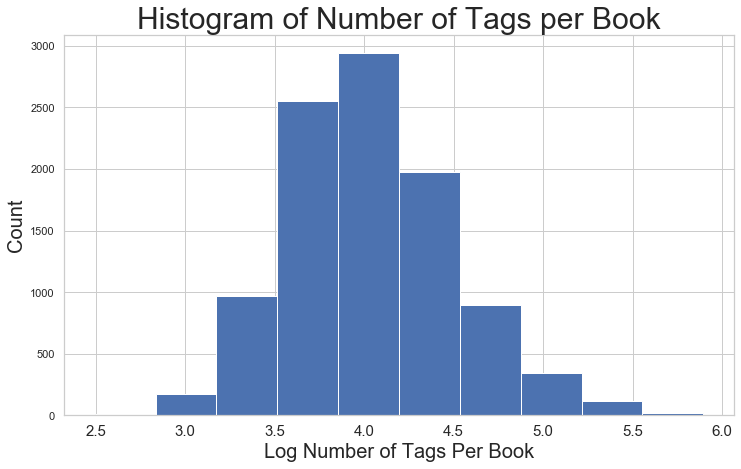

In [16]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.hist(number_of_tags_per_book)
labels = ax.get_xticklabels()
plt.setp(labels, fontsize=15)
plt.title("Histogram of Number of Tags per Book", fontsize=30)
plt.xlabel("Log Number of Tags Per Book", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.savefig("plots/hist_number_tags_per_book.png", bbox_inches="tight")

# number of ratings per book

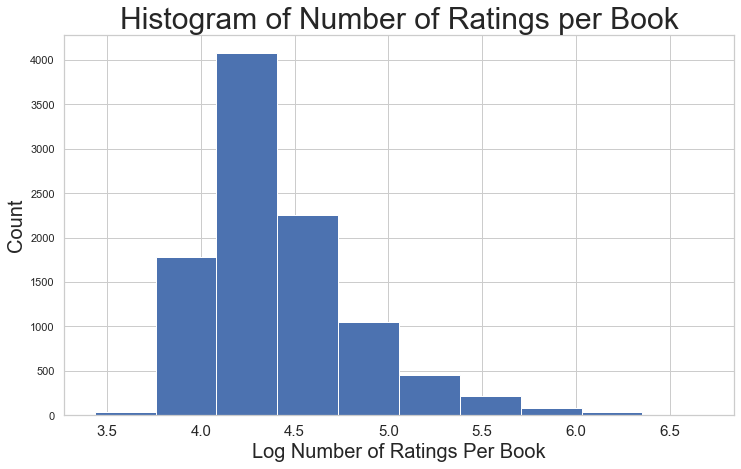

In [17]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.hist(books.ratings_count.apply(np.log10))
labels = ax.get_xticklabels()
plt.setp(labels, fontsize=15)
plt.title("Histogram of Number of Ratings per Book", fontsize=30)
plt.xlabel("Log Number of Ratings Per Book", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.savefig("plots/hist_number_ratings_per_book.png", bbox_inches="tight")

# Distribution of Mean Ratings

In [18]:
books.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

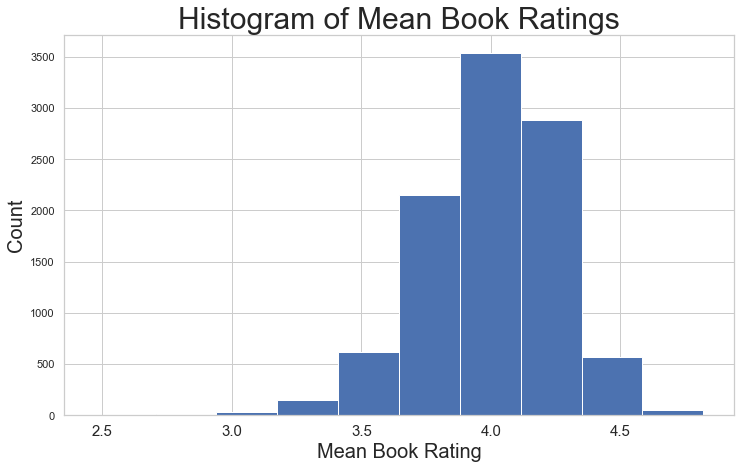

In [19]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.hist(books.average_rating)
labels = ax.get_xticklabels()
plt.setp(labels, fontsize=15)
plt.title("Histogram of Mean Book Ratings", fontsize=30)
plt.xlabel("Mean Book Rating", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.savefig("plots/hist_mean_book_rating.png", bbox_inches="tight")

In [20]:
(
    books
    .dropna()
    .assign(mask = lambda x: x.title.str.contains("Queen's"))
    .query("`mask`")
)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,mask
1500,1501,252499,252499,1024199,61,743246071,9.780743e+12,Philippa Gregory,2003.0,The Queen's Fool,...,74843,2884,859,4137,21150,29517,19180,https://images.gr-assets.com/books/1399204116m...,https://images.gr-assets.com/books/1399204116s...,True
3443,3444,448873,448873,1069505,4,60824972,9.780061e+12,Megan Whalen Turner,1996.0,The Thief,...,43691,4973,1027,2577,9880,15787,14420,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,True
5814,5815,3112850,3112850,3144132,26,738713708,9.780739e+12,Maggie Stiefvater,2008.0,Lament: The Faerie Queen's Deception (Books of...,...,28824,2658,885,2740,8144,9603,7452,https://images.gr-assets.com/books/1265410418m...,https://images.gr-assets.com/books/1265410418s...,True
6008,6009,40159,40159,847545,23,006083577X,9.780061e+12,Megan Whalen Turner,2006.0,The King of Attolia,...,24349,2029,237,537,2663,7505,13407,https://images.gr-assets.com/books/1293505327m...,https://images.gr-assets.com/books/1293505327s...,True
6613,6614,18693743,18693743,25595312,28,425268780,9.780425e+12,Mark Lawrence,2014.0,Prince of Fools,...,16567,1460,217,606,2838,7008,5898,https://images.gr-assets.com/books/1385072473m...,https://images.gr-assets.com/books/1385072473s...,True
